Assignment

Your boss wants to know how electricity prices in NO2 and Germany have developed over the
sample period. Therefore, she has asked you to create a line plot that visualizes the hourly
electricity price in NO2 and Germany. The graph should:
- consist of two subplots: The first subplot shows the hourly electricity price in NO2 over time. 
The second subplot shows the hourly electricity price in Germany over time.
- add a vertical line to each subplot to indicate the official opening of Nordlink (December
9, 2020).
- be stored as a png file called “figure_task1.png”.

What is your conclusion? How has the electricity price in NO2 and Germany developed over
time? Have the prices increased or decreased after the opening of Nordlink? Extra: Do you have
any suggestions for why we sometimes observe negative electricity prices?

In [18]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

#Global Variables
data_path = 'data/DayAheadPrices_12.1.D'
file_matter = 'DayAheadPrices_12.1.D.csv'
nordlink_opening = datetime(2020, 12, 9)

In [19]:
def total_filtered_data(path, matter, first_year=2019, last_year=2023):
    df = []
    price_list = []
    physical_list = []
    for year in range(first_year, last_year +1):
        for month in range(1, 13):

            #Defining File Name
            file = f'{year}_{month:02}_{matter}'

            #Construct File Path
            file_path = os.path.join(path, file)

            #Checking File Existance
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter='\t')

                #Converting DateTime into Datetime Format
                df['DateTime'] = pd.to_datetime(df['DateTime'])

                if 'Prices' in matter:

                    #Filter Data For NO2, DE_LU, PT60M
                    df = df[(df['MapCode'].isin(['NO2', 'DE_LU'])) & (df['ResolutionCode'] == 'PT60M')]
                    price_list.append(df[['MapCode', 'Price', 'DateTime']])

                elif 'Physical' in matter:
                    #Filter Data for 
                    df = df[(df['InMapCode'].isin(['NO2', 'DE_LU'])) & (df['OutMapCode'].isin(['NO2', 'DE_LU']))]
                    physical_list.append(df[['DateTime', 'InMapCode', 'OutMapCode', 'FlowValue']])
            else:
                    raise ValueError(f'Not found: {file_path}')
    
    #Concatenate All Months, in Each Year into one DataFrame
    full_data_price_list = pd.concat(price_list, ignore_index=True) if price_list else pd.DataFrame()
    full_data_physical_list = pd.concat(physical_list, ignore_index=True) if physical_list else pd.DataFrame()
    return {'price_data': full_data_price_list, 'physical_data': full_data_physical_list}


Testing whether function works to construct a single DataFrame with filtered data.

  MapCode  Price            DateTime
0   DE_LU -33.57 2019-01-01 23:00:00
1   DE_LU -45.92 2019-01-02 00:00:00
2   DE_LU -48.29 2019-01-02 01:00:00
3   DE_LU -44.99 2019-01-02 02:00:00
4   DE_LU -48.93 2019-01-02 03:00:00
    MapCode  Price            DateTime
744     NO2  49.25 2019-01-01 00:00:00
745     NO2  49.17 2019-01-01 01:00:00
746     NO2  48.37 2019-01-01 02:00:00
747     NO2  47.19 2019-01-01 03:00:00
748     NO2  47.37 2019-01-01 04:00:00
  MapCode  Price            DateTime
0   DE_LU -33.57 2019-01-01 23:00:00
1   DE_LU -45.92 2019-01-02 00:00:00
2   DE_LU -48.29 2019-01-02 01:00:00
3   DE_LU -44.99 2019-01-02 02:00:00
4   DE_LU -48.93 2019-01-02 03:00:00


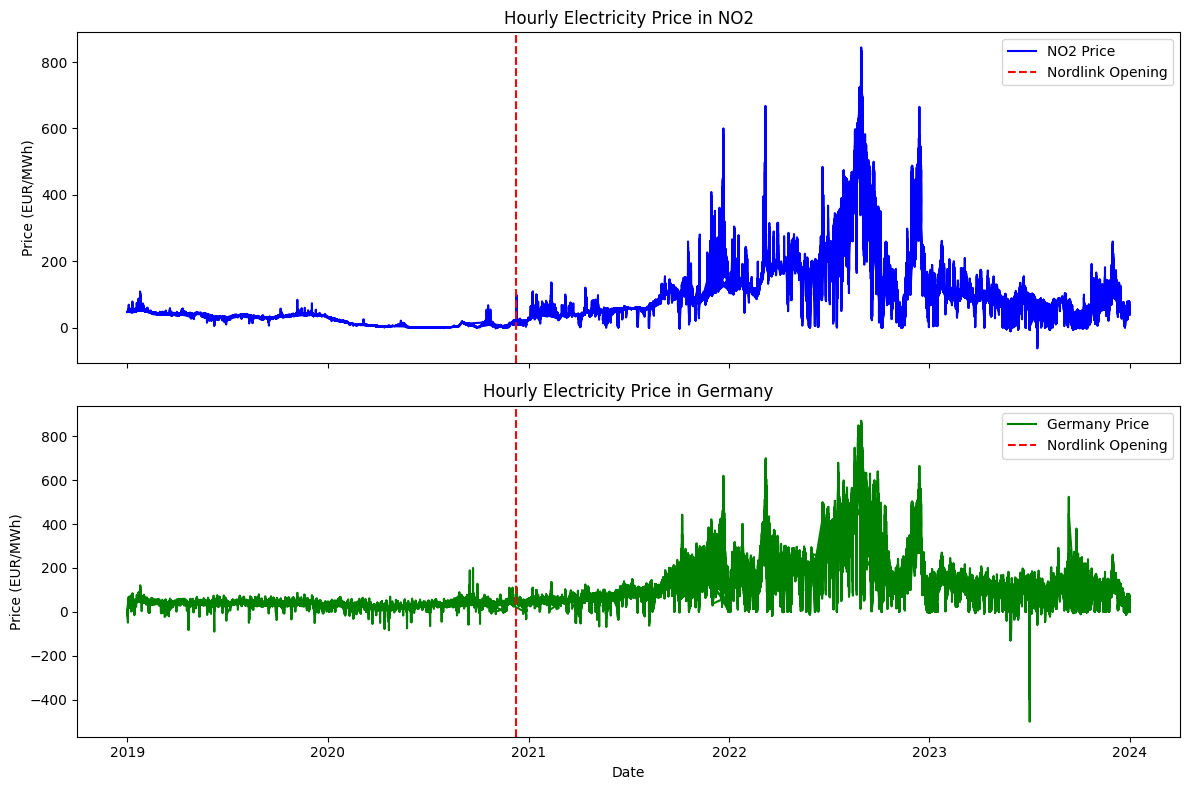

In [20]:
data = total_filtered_data(data_path, file_matter, 2019, 2023)
price_data = data['price_data']

#Selecting Data Rows NO2 and DE_LU Seperately
data_no2 = price_data[price_data['MapCode'] == 'NO2']
data_delu = price_data[price_data['MapCode'] == 'DE_LU']

    #Plotting
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    #Plot NO2 Data
    axs[0].plot(data_no2['DateTime'], data_no2['Price'], color='blue', label='NO2 Price')
    axs[0].axvline(nordlink_opening, color='red', linestyle='--', label='Nordlink Opening')
    axs[0].set_title('Hourly Electricity Price in NO2')
    axs[0].set_ylabel('Price (EUR/MWh)')
    axs[0].legend()

    #Plot DE_LU Data
    axs[1].plot(data_delu['DateTime'], data_delu['Price'], color='green', label='Germany Price')
    axs[1].axvline(nordlink_opening, color='red', linestyle='--', label='Nordlink Opening')
    axs[1].set_title('Hourly Electricity Price in Germany')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Price (EUR/MWh)')
    axs[1].legend()

    # Save the figure
    plt.tight_layout()
    plt.savefig('figure_task1.png')
    plt.show()